<a href="https://colab.research.google.com/github/rhrobin34/CSE412-LAB-5/blob/main/alzheimers_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Alzheimers disease detection </b></div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 1. Import Libraries </b></div>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

%matplotlib inline

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 2. Load data </b></div>

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cse-303-lab/alzheimer disease detection/alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
df.shape

(2149, 35)

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 3. Data Statistics </b></div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [ ]:
# Drop unnecessary column from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [ ]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sum(df.duplicated())

0

In [ ]:
df.corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 4. Data Visualization </b></div>

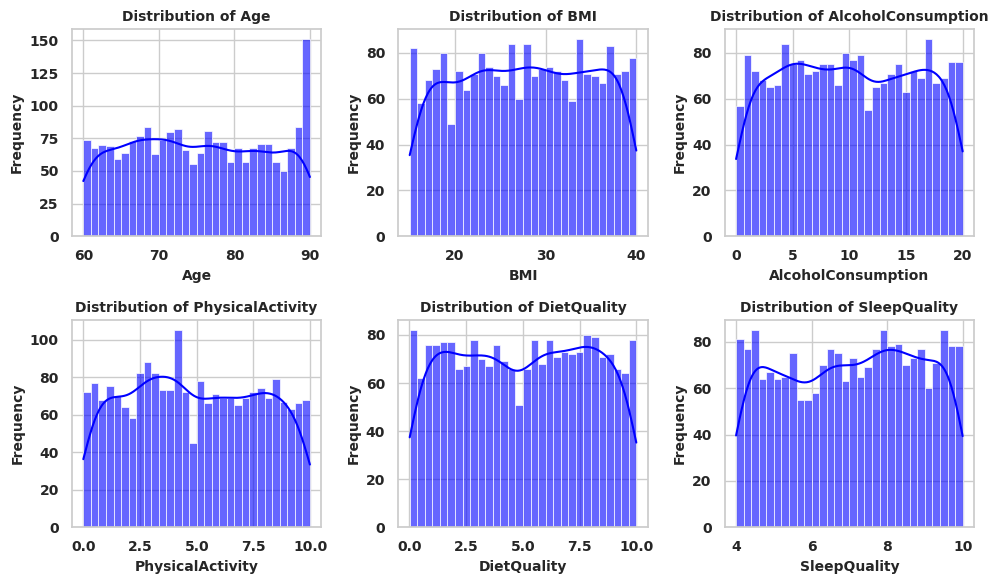

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure font weight is bold for all text in the plot
plt.rc('font', weight='bold')

# Example DataFrame (if not already defined, remove this if df exists)
# df = pd.read_csv('your_dataset.csv')

# List of specific columns to plot
columns_to_plot = ['Age', 'BMI', 'AlcoholConsumption',
                   'PhysicalActivity', 'DietQuality', 'SleepQuality']

# Create a figure with subplots (2 rows, 3 columns) and a smaller size
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Smaller figure size

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, kde=True, bins=30, color='blue', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=10, weight='bold')  # Smaller title text
    axes[i].set_xlabel(column, fontsize=10, weight='bold')  # X-label size
    axes[i].set_ylabel('Frequency', fontsize=10, weight='bold')  # Y-label size
    axes[i].tick_params(axis='both', which='major', labelsize=10)  # Tick labels size

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


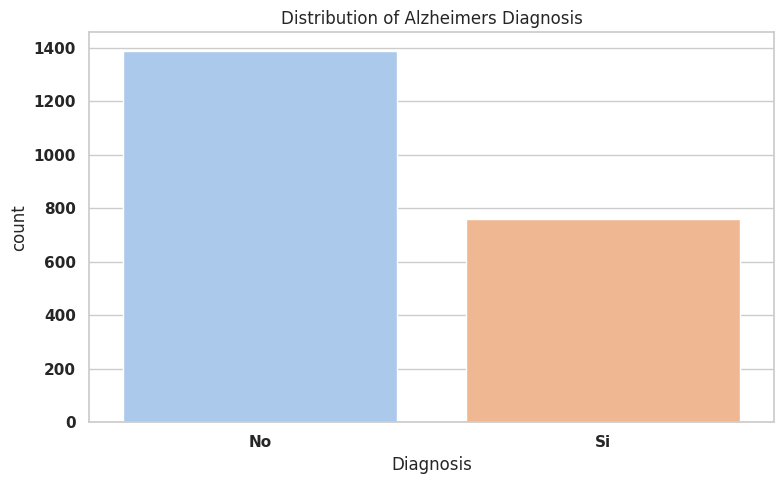

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Diagnosis', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Alzheimers Diagnosis')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

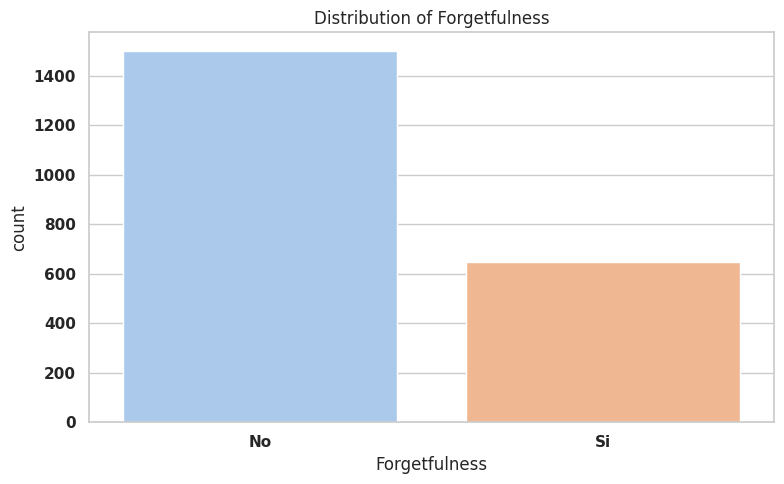

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Forgetfulness', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Forgetfulness')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

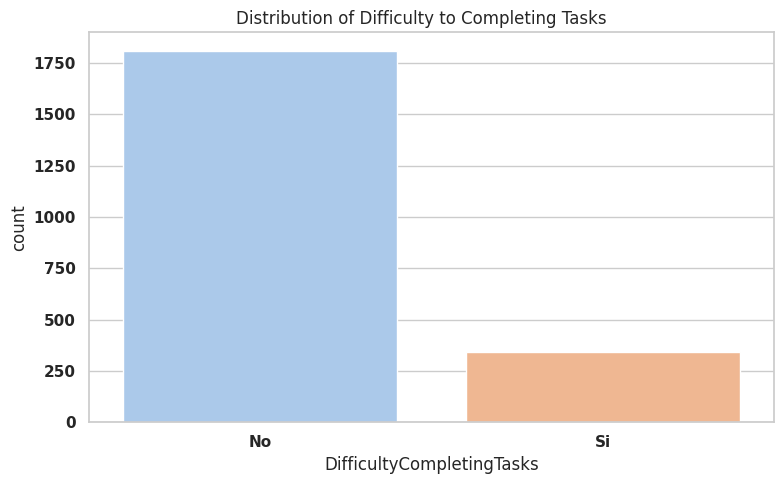

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='DifficultyCompletingTasks', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Difficulty to Completing Tasks    ')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

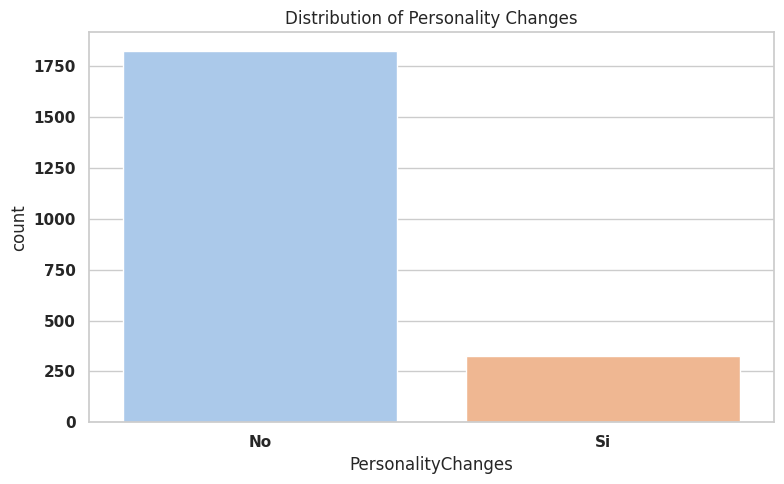

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='PersonalityChanges', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Personality Changes')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

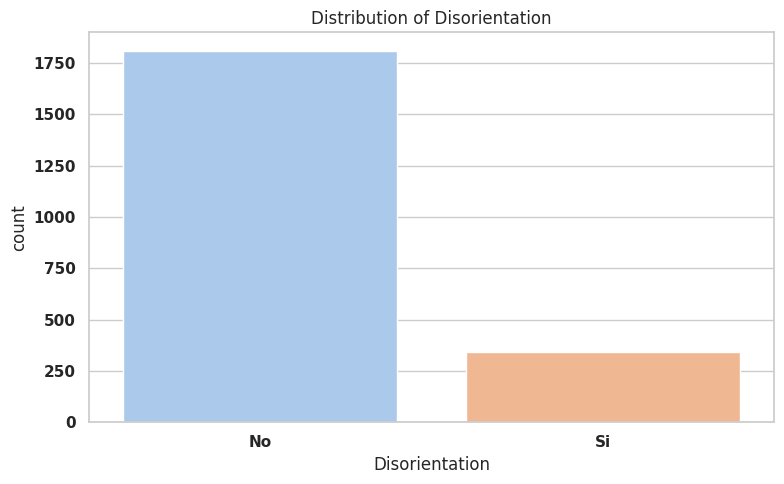

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Disorientation', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Disorientation')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

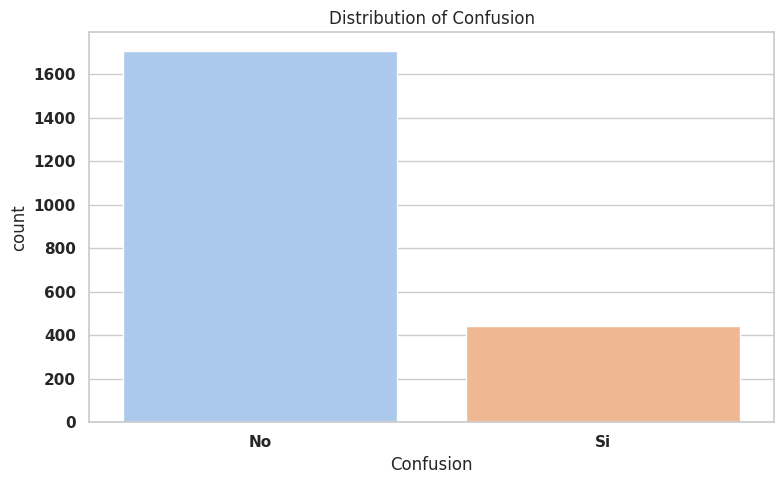

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Confusion', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Confusion')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

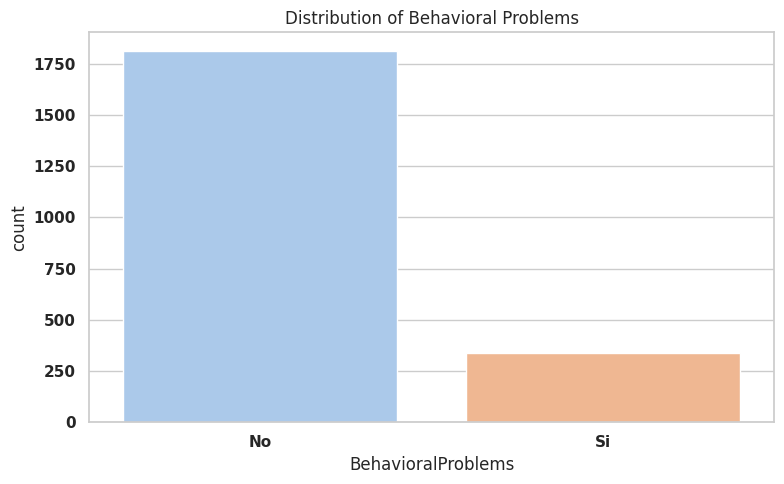

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='BehavioralProblems', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Behavioral Problems')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

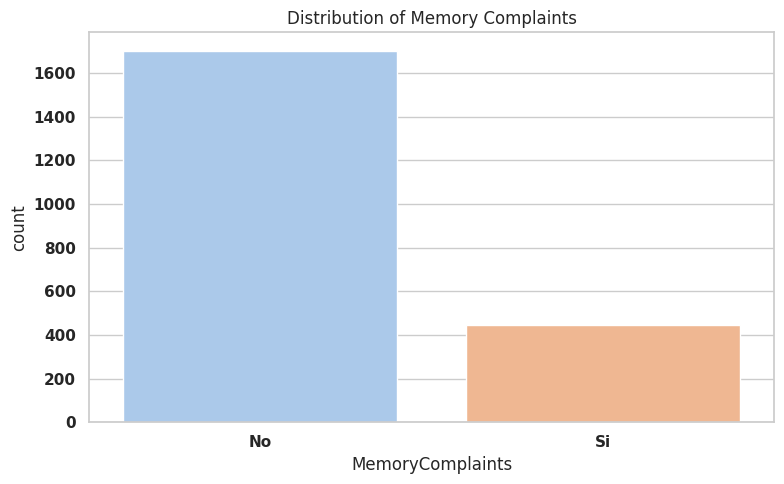

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='MemoryComplaints', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Memory Complaints')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

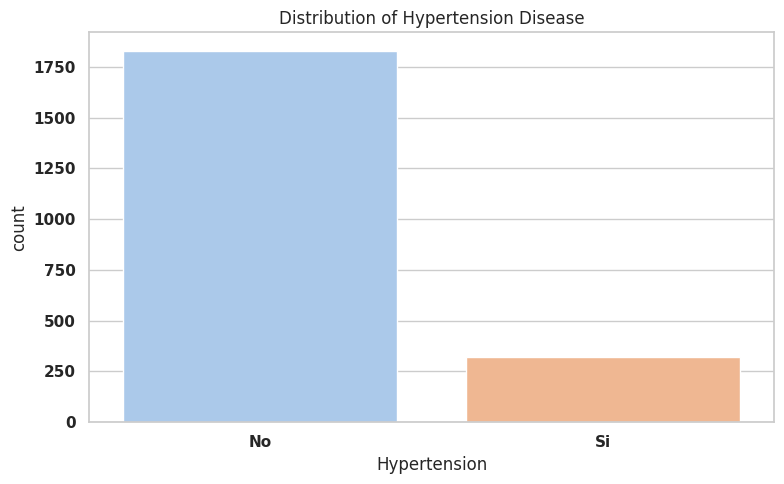

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Hypertension', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Hypertension Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

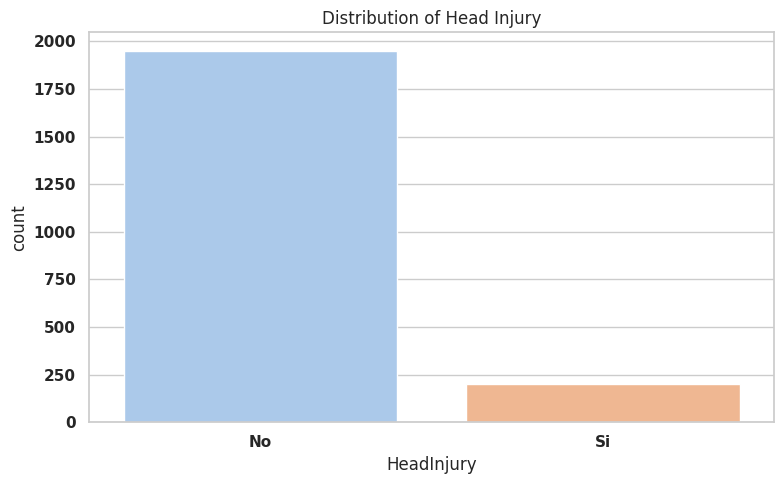

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='HeadInjury', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Head Injury')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

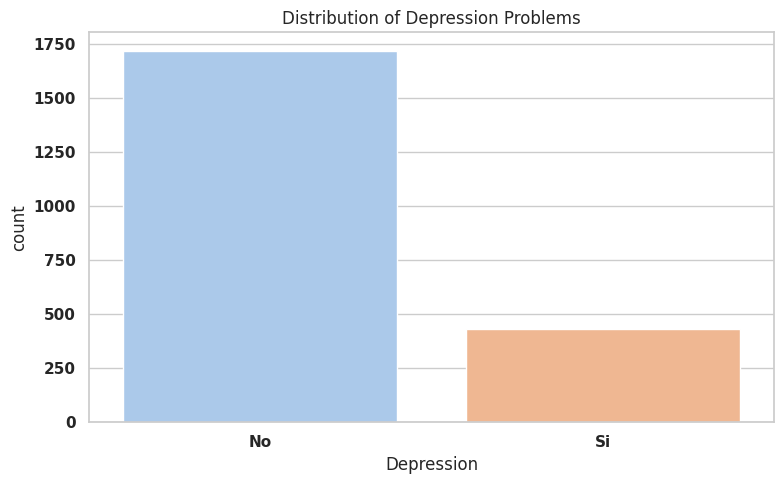

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Depression', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Depression Problems')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

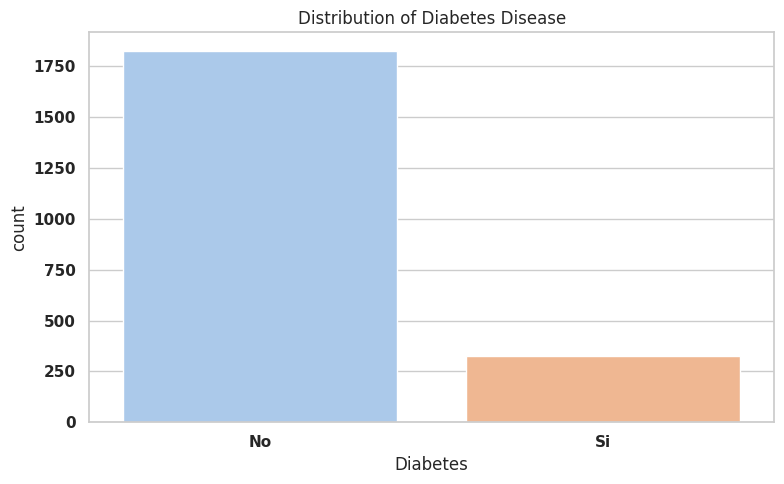

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Diabetes', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Diabetes Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

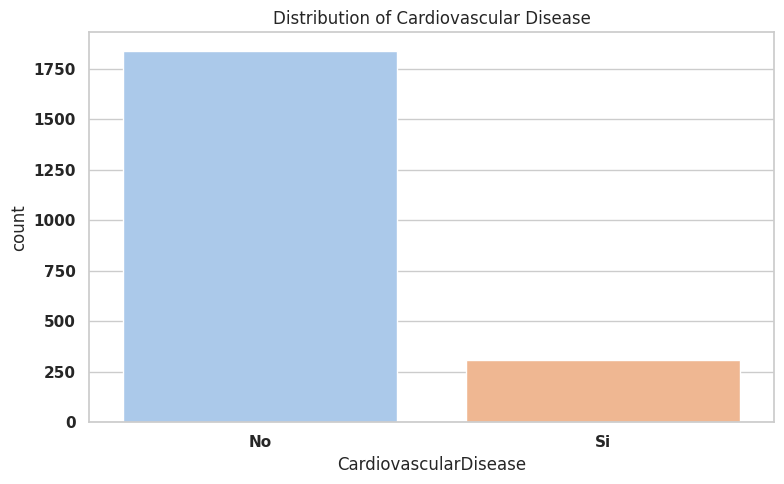

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='CardiovascularDisease', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Cardiovascular Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

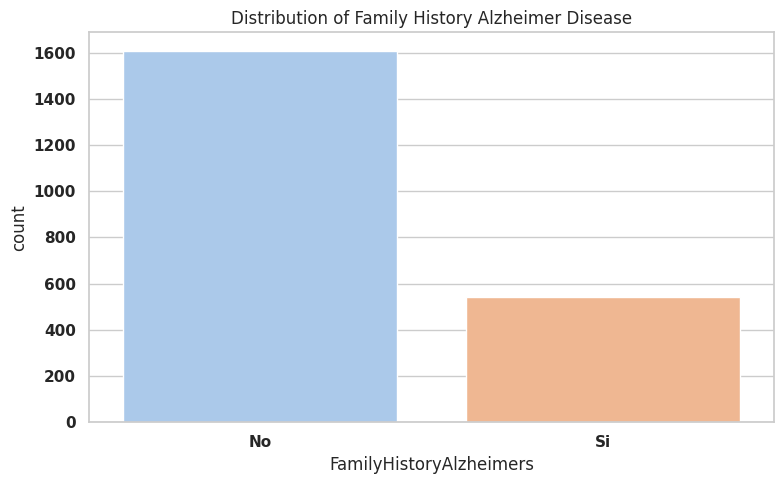

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='FamilyHistoryAlzheimers', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Family History Alzheimer Disease')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

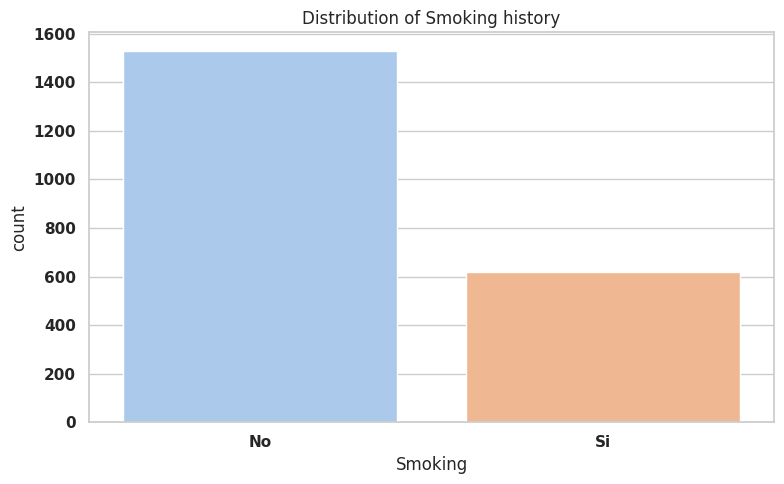

In [ ]:
# Set custom labels
labels = ["No", "Si"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Smoking', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Smoking history')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

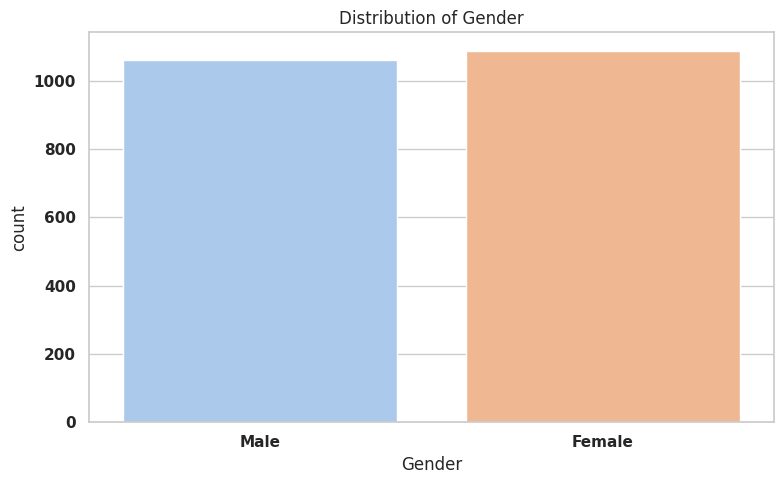

In [ ]:
# Set custom labels
labels = ["Male", "Female"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Gender', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Gender')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

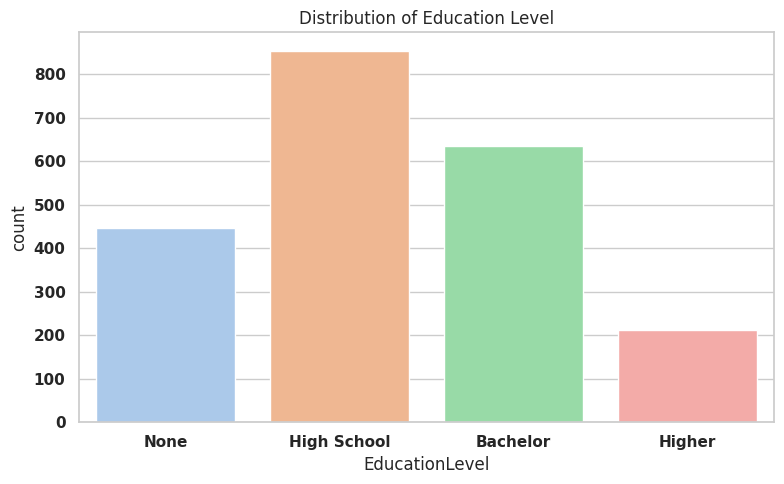

In [ ]:
# Set custom labels
labels = ["None", "High School", 'Bachelor', "Higher"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='EducationLevel', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Education Level')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

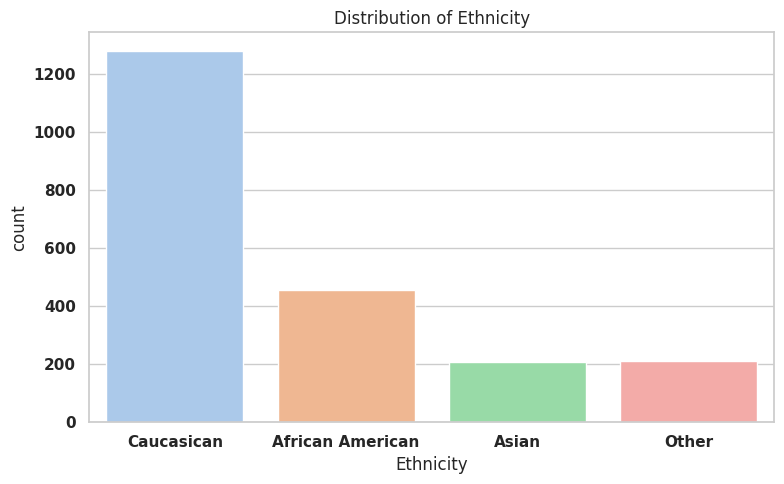

In [ ]:
# Set custom labels
labels = ["Caucasican", "African American", 'Asian', "Other"]
ticks = range(len(labels))

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the count plot
sns.countplot(data=df, x='Ethnicity', ax=ax, palette=sns.color_palette("pastel"))
ax.set_title('Distribution of Ethnicity')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 5. Feature Engineering </b></div>

In [ ]:
# 4. Feature Engineering
# One-Hot Encoding for categorical variables
categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separating features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Handling missing values if any
X.fillna(X.mean(), inplace=True)
y.fillna(y.mode()[0], inplace=True)

# 5. Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1934, 8624)
(215, 8624)


<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 6. Data Split and Normalization </b></div>

In [ ]:
# 6. Normalization
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the data
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)


<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 7. Model Training and Evaluation </b></div>

In [ ]:
# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(scaled_X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Select top N features (for example, top 10)
top_n_features = feature_importances.head(10)['feature']
X_top_features = X[top_n_features]

# Update train and test sets with selected features
X_train_top = X_train[top_n_features]
X_test_top = X_test[top_n_features]

# Standardize the selected features
scaler_top = StandardScaler()
scaler_top.fit(X_train_top)

scaled_X_train_top = scaler_top.transform(X_train_top)
scaled_X_test_top = scaler_top.transform(X_test_top)

In [ ]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Define hyperparameters
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
    },
    'SVM': {
        'C': [1, 10],
        'gamma': [0.1, 0.01],
    },
    'KNN': {
        'n_neighbors': [5, 7],
    },
    'LogisticRegression': {
        'C': [1, 10],
    },
    'DecisionTree': {
        'max_depth': [None, 10],
        'min_samples_split': [2, 10],
    }
}

# Training and evaluating each model
best_models = {}
results = {}

for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(scaled_X_train_top, y_train)
    best_models[model_name] = grid_search.best_estimator_
    y_pred = best_models[model_name].predict(scaled_X_test_top)

    print(f"{model_name} Classifier")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    }

Training RandomForest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
RandomForest Classifier
Accuracy: 0.9488372093023256
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       142
           1       0.94      0.90      0.92        73

    accuracy                           0.95       215
   macro avg       0.95      0.94      0.94       215
weighted avg       0.95      0.95      0.95       215

Confusion Matrix:
 [[138   4]
 [  7  66]]
F1 Score: 0.9485679380177394
Training SVM...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
SVM Classifier
Accuracy: 0.8837209302325582
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       142
           1       0.85      0.79      0.82        73

    accuracy                           0.88       215
   macro avg       0.88      0.86      0.87       215
weighted avg       0.88 

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:black; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> 8. Visualization of Results </b></div>

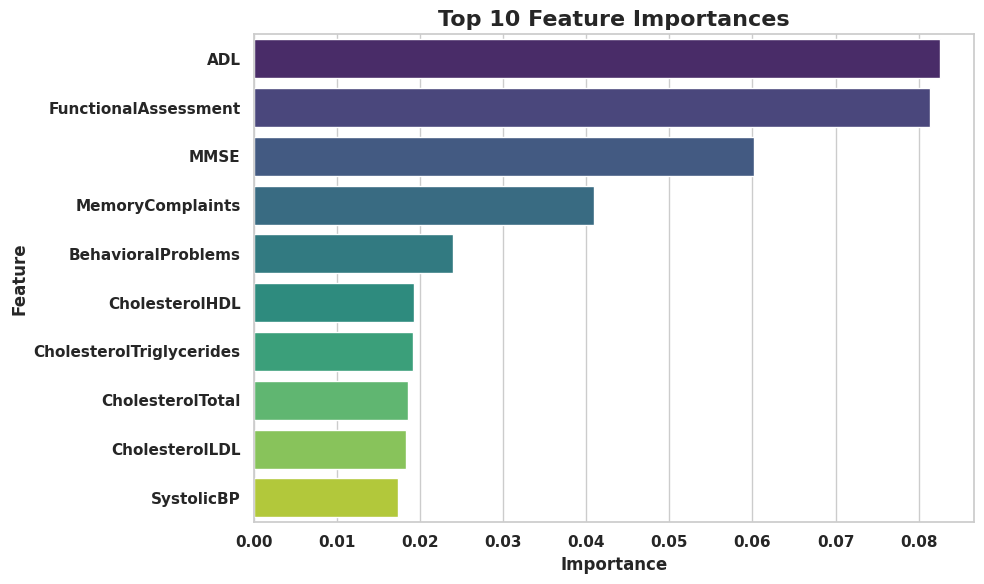

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all text is bold
plt.rc('font', weight='bold')

# Plotting feature importance
plt.figure(figsize=(10, 6))

# Use 'viridis' color palette for the barplot
sns.barplot(data=feature_importances.head(10), x='importance', y='feature', palette='viridis')

# Add bold labels and title
plt.title('Top 10 Feature Importances', fontsize=16, weight='bold')
plt.xlabel('Importance', fontsize=12, weight='bold')
plt.ylabel('Feature', fontsize=12, weight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


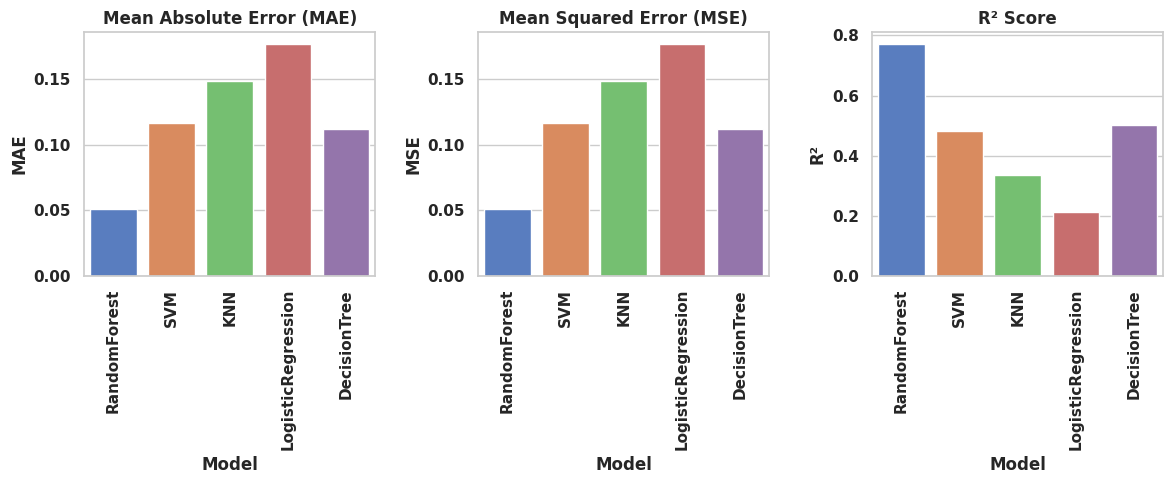

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that all text is bold
plt.rc('font', weight='bold')

metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R2': []
}

for model_name, model in best_models.items():
    y_pred = model.predict(scaled_X_test_top)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plot MAE, MSE, and R² for comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='muted')
plt.title('Mean Absolute Error (MAE)', weight='bold')
plt.xticks(rotation=90, weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Model', weight='bold')
plt.ylabel('MAE', weight='bold')

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='muted')
plt.title('Mean Squared Error (MSE)', weight='bold')
plt.xticks(rotation=90, weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Model', weight='bold')
plt.ylabel('MSE', weight='bold')

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R2', data=metrics_df, palette='muted')
plt.title('R² Score', weight='bold')
plt.xticks(rotation=90, weight='bold')
plt.yticks(weight='bold')
plt.xlabel('Model', weight='bold')
plt.ylabel('R²', weight='bold')

plt.tight_layout()
plt.show()


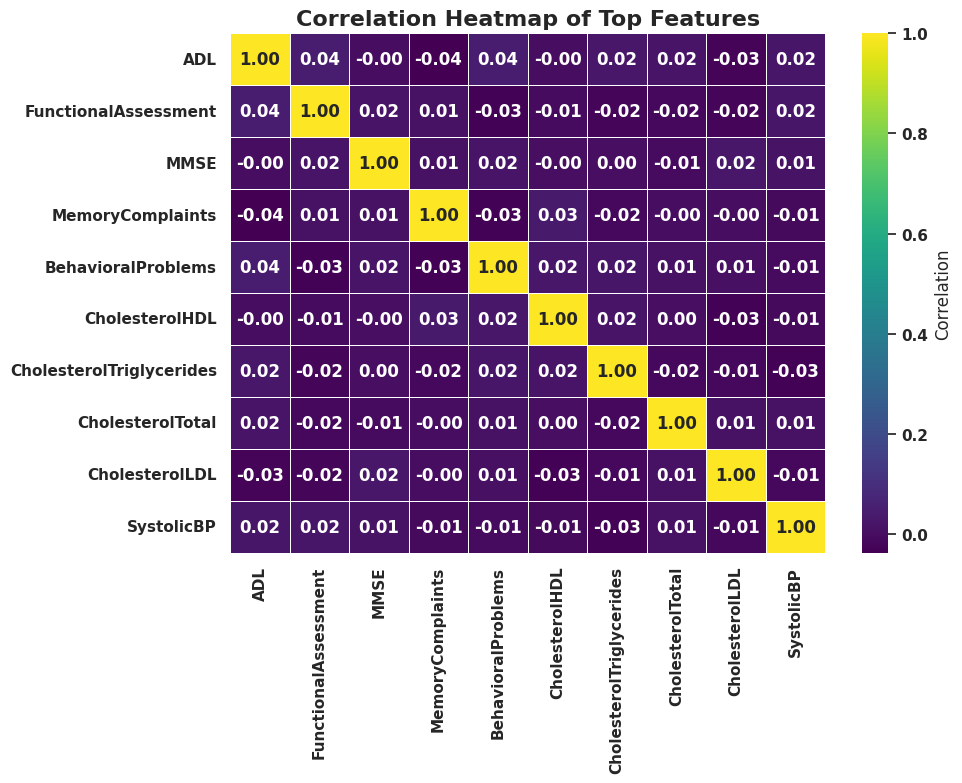

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all text is bold
plt.rc('font', weight='bold')

# Correlation heatmap of the selected top features with a different color scheme
plt.figure(figsize=(10, 8))

# Use 'viridis' colormap, which can be changed to any other like 'plasma', 'cividis', or 'RdBu'
sns.heatmap(X_train_top.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Correlation'}, annot_kws={"weight": "bold"})

# Bold the title and axes labels
plt.title('Correlation Heatmap of Top Features', fontsize=16, weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


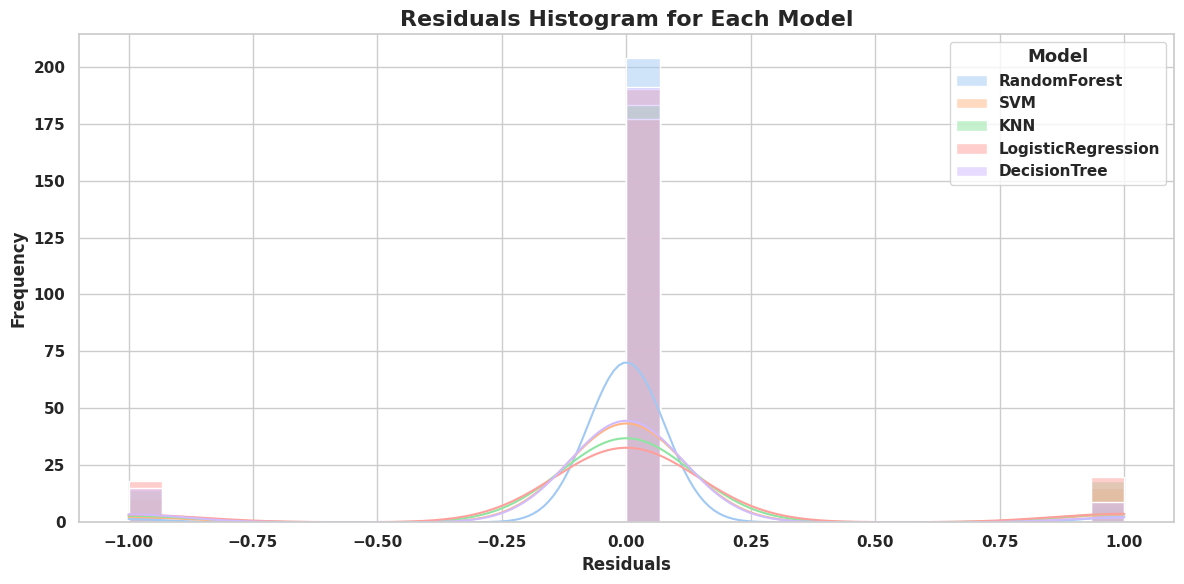

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all text is bold
plt.rc('font', weight='bold')

# Set up the figure
plt.figure(figsize=(12, 6))

# Loop through each model to plot the residuals
for model_name, model in best_models.items():
    y_pred = model.predict(scaled_X_test_top)
    residuals = y_test - y_pred

    # Plot the residuals for each model
    sns.histplot(residuals, bins=30, kde=True, label=model_name, alpha=0.5)

# Add title and labels with bold text
plt.title('Residuals Histogram for Each Model', fontsize=16, weight='bold')
plt.xlabel('Residuals', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')

# Bold the legend title and set layout
plt.legend(title='Model', title_fontsize='13', fontsize='11')
plt.tight_layout()

# Show the plot
plt.show()


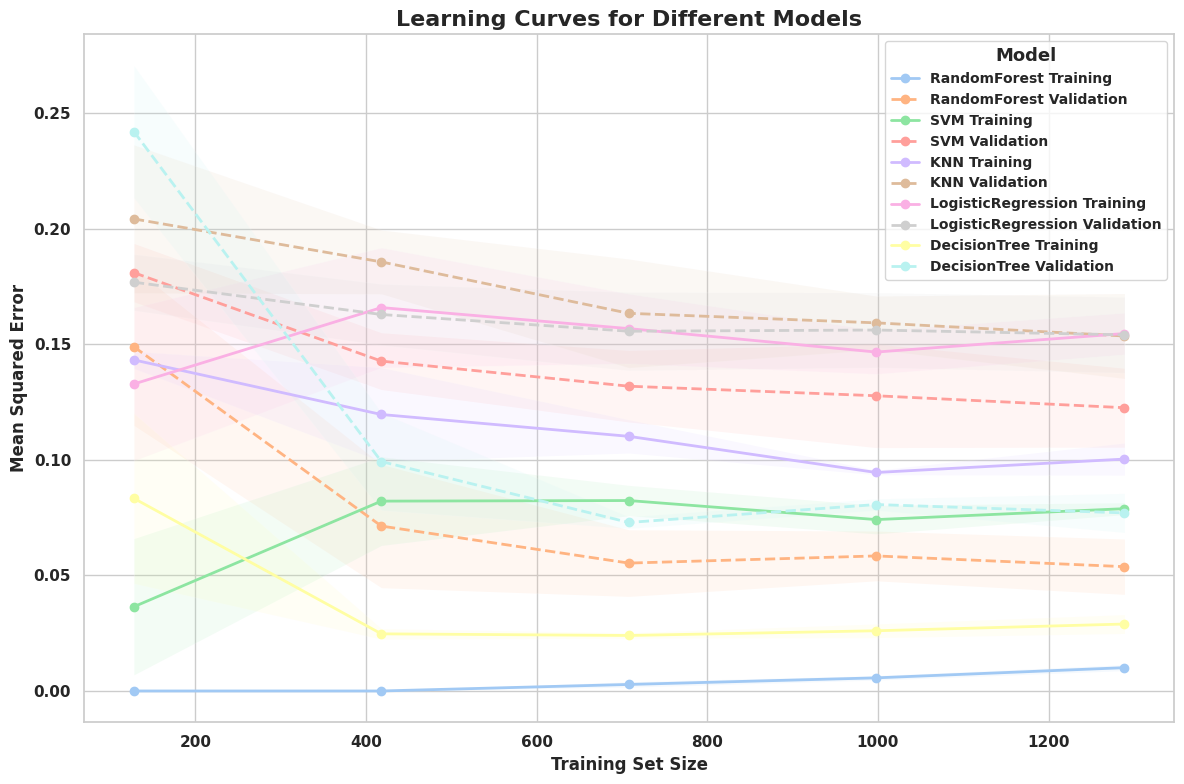

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Ensure all text is bold
plt.rc('font', weight='bold')

plt.figure(figsize=(12, 8))

# Loop through each model and plot the learning curve
for model_name, model in best_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, scaled_X_train_top, y_train, cv=3, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error'
    )

    # Calculate the mean and standard deviation of training and testing scores
    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    # Plot learning curve for each model
    plt.plot(train_sizes, train_mean, 'o-', label=f'{model_name} Training', linewidth=2)
    plt.plot(train_sizes, test_mean, 'o--', label=f'{model_name} Validation', linewidth=2)

    # Fill the area between mean ± std for training and validation sets
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add bold labels, title, and legend
plt.xlabel('Training Set Size', fontsize=12, weight='bold')
plt.ylabel('Mean Squared Error', fontsize=12, weight='bold')
plt.title('Learning Curves for Different Models', fontsize=16, weight='bold')

# Adjust the legend
plt.legend(loc='best', fontsize=10, title_fontsize='13', title='Model')
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


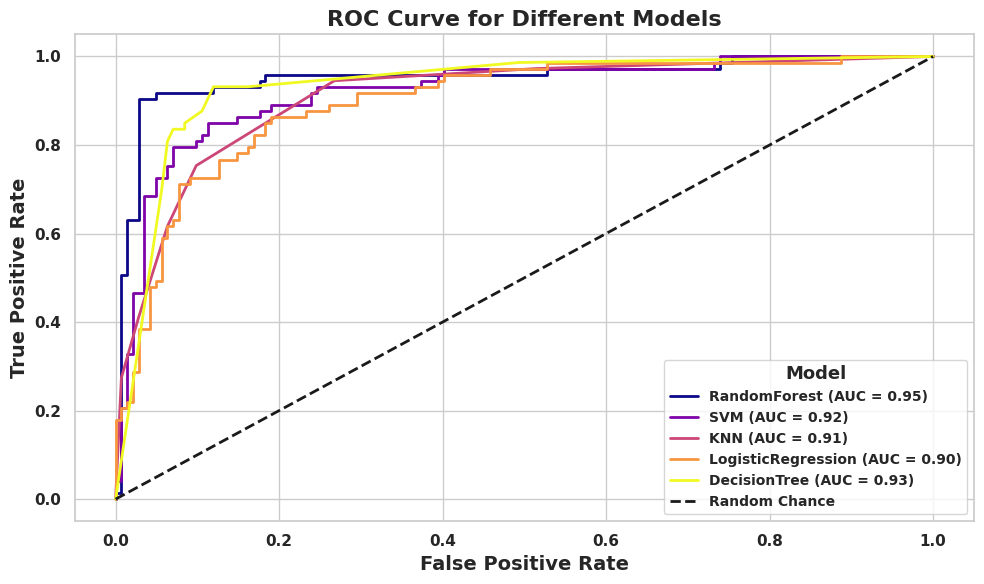

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Ensure all text is bold
plt.rc('font', weight='bold')

# Set up the figure for ROC curves
plt.figure(figsize=(10, 6))

# Use a colormap for distinct colors (plasma)
colors = plt.cm.plasma(np.linspace(0, 1, len(best_models)))

# Plot ROC curve for each model
for i, (model_name, model) in enumerate(best_models.items()):
    # Re-initialize SVM with probability=True if necessary
    if model_name == 'SVM' and not hasattr(model, 'predict_proba'):
        model = SVC(probability=True)
        model.fit(scaled_X_train_top, y_train)
        best_models[model_name] = model

    # Predict probabilities and calculate ROC metrics
    y_score = model.predict_proba(scaled_X_test_top)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve with a unique color
    plt.plot(fpr, tpr, color=colors[i], linewidth=2,
             label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', linewidth=2)

# Set title and axis labels with bold fonts
plt.title('ROC Curve for Different Models', fontsize=16, weight='bold')
plt.xlabel('False Positive Rate', fontsize=14, weight='bold')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold')

# Add legend with title
plt.legend(loc='lower right', fontsize=10, title='Model', title_fontsize=13)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
